In [17]:
import os, sys
import random
import numpy as np

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable
import torch.optim as optim

import matplotlib.pyplot as plt
%matplotlib inline

from util import basic
print("Done!")

from tqdm import tqdm_notebook as tqdm



Done!


In [2]:
import seaborn as sns

In [3]:
import sys, os
import numpy as np
import gzip

## Load benchmark dataset 

In [4]:
seq_convert = {'N':'0', 'A':'1', 'C':'2', 'G':'3', 'T':'4'}

In [5]:
seq_convert_rev = {'0': 'N', '1':'A', '2':'C', '3':'G', '4':'T'}

In [66]:
start_codon = set(["ATG", "GTG", "TTG", "CTG", "ATT", "ATC"])

stop_codon = set(["TAG", "TAA", "TGA"])

In [7]:
folder_name = (
    '/mnt/scratch7/hirak/Attention4DNASeqRepresentation/dataset/Predict_Bothways_pos_neg_example'
)

In [8]:
full_genome_file = (
    '/mnt/scratch7/hirak/Attention4DNASeqRepresentation/dataset/Predict_Bothways/forward_genes/forward_batch_0_0.gz'
)

In [99]:
max_data_size = 1527294

def read_input_file(file_path, label=-1):
    x_data = []
    y_data = []

    file_read = open(file_path, "r")
    for line in file_read:
        data = [int(i) for i in line.strip()]
        x_data.append(data)
        y_data.append(label)
        #print(x_data[-1], y_data[-1])
        if len(x_data) == max_data_size:
            break
    file_read.close()
    print("Sequences Read: ", len(x_data))
    return np.array(x_data), np.array(y_data)

In [15]:
root_dir = "/mnt/scratch7/hirak/"
x_data_pos_full, y_data_pos_full = read_input_file(os.path.join(root_dir, "Attention4DNASeqRepresentation/dataset/gene_range_start_codon.txt"), 1)

original_neg_intergenic_data, original_neg_intergenic_label = read_input_file(os.path.join(root_dir, "Attention4DNASeqRepresentation/dataset/intragenic_start_codon.txt"), 0)
original_neg_coding_data, original_neg_coding_label = read_input_file(os.path.join(root_dir, "Attention4DNASeqRepresentation/dataset/coding_start_codon.txt"), 0)

x_data_neg_full = np.concatenate((original_neg_coding_data, original_neg_intergenic_data))
y_data_neg_full = np.concatenate((original_neg_coding_label, original_neg_intergenic_label))


Sequences Read:  1527294
Sequences Read:  1527294
Sequences Read:  1527294


In [9]:
import bisect

In [86]:
#def old_pos_neg(file_name):
inframe_write = 0
outframe_write = 0

generange_write = 0

end_set = set()
start_set = set()

start_pos = 0
start_neg = 0

end_pos = 0
end_neg = 0


codon_type = 'start'
file_name = full_genome_file

file_read = gzip.open(file_name, 'rt', encoding='utf-8')

seq_name = file_read.readline()
print(seq_name)

sequence = 'N'*50 + file_read.readline().strip() + 'N'*50
gene_nogene = '0'*50 + file_read.readline().strip() + '0'*50
start_codon_seq = '0'*50 + file_read.readline().strip() + '0'*50
stop_codon_seq = '0'*50 + file_read.readline().strip() + '0'*50

assert(len(sequence) == len(gene_nogene))
assert(len(sequence) == len(start_codon_seq))
assert(len(start_codon_seq) == len(stop_codon_seq))

"""
for line in file_read:
    print "", len(line)
#break
"""

if codon_type == "start":
    codon_set = ("ATG", "GTG", "TTG", "CTG", "ATT", "ATC")
else:
    codon_set = ("TAG", "TAA", "TGA") 

for interval in fragment_interval: 
    start, end = interval[0], interval[1]
    
    around_start = sequence[start-49 : start+52]
    around_end = sequence[end-49 : end+52]
    
    if((codon_type == 'start') and not(start in start_set)):
        if start_codon_seq[start] == '1':
            start_pos += 1
        else:
            start_neg += 1
        start_set.add(start)
    elif((codon_type == 'end') and not(end in end_set)):
        if end_codon_seq[end] == '1':
            end_pos += 1
        else:
            end_neg += 1
        end_set.add(end)
    
   
    
    
#     for i in range(start, len(sequence)-52):
#         codon = sequence[i-1:i+2]
#         #print codon

#         if codon in codon_set:
#             if codon_type == "start":
#                 around_gene_boundary = [int(x) for x in start_codon[i-25:i+25]]
#             else:
#                 around_gene_boundary = [int(x) for x in stop_codon[i-25:i+25]]

#             if np.sum(around_gene_boundary) == 0:
#                 continue

#             train_seq = sequence[i-50:i+51]
#             #print train_seq
#             convert = ''.join([seq_convert[train_seq[k]] for k in range(len(train_seq))])

#             if gene_nogene[i] == '0':
#                  outframe_write += 1
#             else:
#                  if codon_type == "start" and start_codon[i] == '1':
#                      generange_write += 1
#                  elif codon_type == "stop" and stop_codon[i] == '1':
#                      generange_write += 1
#                  else:
#                      inframe_write += 1

>U00096.3,GCA_000005845.2_ASM584v2_genomic



In [87]:
print(start_pos, start_neg, end_pos, end_neg)

2025 490080 0 0


In [69]:
np.sum([int(x) for x in start_codon_seq])

6036

In [70]:
print(generange_write, inframe_write)

2027 490296


In [57]:
len(sequence[63-49:63+51])

100

In [34]:
original_start_index = []
original_stop_index = []
for i in tqdm(range(len(sequence)-2)):
    codon = sequence[i:i+3]
    if codon in start_codon:
        original_start_index += [i]
    elif(codon in stop_codon):
        
        original_stop_index += [i]

In [35]:
#stop_index[:10], start_index[:20]

In [82]:
fragment_interval = []
length_dist = []
for x in tqdm(range(0, len(original_start_index))):
    stop_index = bisect.bisect_left(original_stop_index, original_start_index[x])
    considerations = 0

    for y in range(stop_index, len(original_stop_index)):
        if considerations == 1:
            break

        i = original_stop_index[y]
        k = original_start_index[x]            

        if i - k > 25000:
            break

        if not (i-k) % 3 == 0:
            continue

        if not (i - k) > 2000:
            continue
            
        fragment_interval += [[k, i]]
        length_dist += [i-k]
        break

In [83]:
 len(fragment_interval)

492105

In [85]:
fragment_interval

[[58, 2188],
 [61, 2188],
 [65, 2846],
 [79, 2188],
 [85, 2188],
 [87, 2271],
 [89, 2846],
 [93, 2271],
 [105, 2271],
 [109, 2188],
 [122, 2846],
 [127, 2188],
 [135, 2271],
 [140, 2846],
 [148, 2188],
 [154, 2188],
 [159, 2271],
 [160, 2188],
 [218, 2846],
 [235, 2263],
 [239, 2846],
 [248, 2846],
 [260, 2846],
 [272, 2846],
 [278, 2846],
 [294, 2325],
 [301, 2401],
 [337, 2401],
 [343, 2401],
 [386, 2846],
 [392, 2846],
 [395, 2846],
 [412, 2428],
 [416, 2846],
 [423, 2436],
 [437, 2846],
 [441, 2655],
 [444, 2655],
 [452, 2846],
 [455, 2846],
 [465, 2655],
 [482, 2846],
 [498, 2655],
 [512, 2846],
 [524, 2846],
 [527, 2846],
 [533, 2846],
 [536, 2846],
 [537, 2655],
 [548, 2846],
 [561, 2655],
 [575, 2846],
 [582, 2655],
 [593, 2846],
 [597, 2655],
 [608, 2846],
 [644, 2846],
 [652, 2677],
 [653, 2846],
 [669, 2697],
 [676, 2677],
 [678, 2697],
 [693, 2697],
 [698, 2846],
 [702, 2838],
 [707, 2846],
 [713, 2846],
 [716, 2846],
 [724, 2728],
 [737, 2846],
 [744, 2838],
 [749, 2846],


In [84]:
length_dist

[2130,
 2127,
 2781,
 2109,
 2103,
 2184,
 2757,
 2178,
 2166,
 2079,
 2724,
 2061,
 2136,
 2706,
 2040,
 2034,
 2112,
 2028,
 2628,
 2028,
 2607,
 2598,
 2586,
 2574,
 2568,
 2031,
 2100,
 2064,
 2058,
 2460,
 2454,
 2451,
 2016,
 2430,
 2013,
 2409,
 2214,
 2211,
 2394,
 2391,
 2190,
 2364,
 2157,
 2334,
 2322,
 2319,
 2313,
 2310,
 2118,
 2298,
 2094,
 2271,
 2073,
 2253,
 2058,
 2238,
 2202,
 2025,
 2193,
 2028,
 2001,
 2019,
 2004,
 2148,
 2136,
 2139,
 2133,
 2130,
 2004,
 2109,
 2094,
 2097,
 2094,
 2028,
 2079,
 2076,
 2070,
 2064,
 2061,
 2013,
 2016,
 2019,
 2007,
 2001,
 2007,
 2001,
 2919,
 2016,
 2016,
 2895,
 2892,
 2025,
 2874,
 2010,
 2853,
 2850,
 2028,
 2025,
 2022,
 2019,
 2814,
 2031,
 2028,
 2025,
 2790,
 2766,
 2763,
 2058,
 2055,
 2751,
 2067,
 2733,
 2052,
 2049,
 2022,
 2040,
 2709,
 2013,
 2079,
 2670,
 2064,
 2061,
 2052,
 2034,
 2010,
 2001,
 2136,
 2004,
 2127,
 2124,
 2535,
 2085,
 2511,
 2508,
 2499,
 2496,
 2013,
 2043,
 2463,
 2034,
 2025,
 2019,
 2433,

(array([4.06118e+05, 4.06280e+04, 2.18190e+04, 1.15890e+04, 5.30600e+03,
        2.74700e+03, 1.57500e+03, 8.89000e+02, 6.12000e+02, 4.00000e+02,
        3.13000e+02, 1.73000e+02, 5.10000e+01, 1.10000e+01, 2.30000e+01,
        1.40000e+01, 1.40000e+01, 8.00000e+00, 1.00000e+01, 1.60000e+01]),
 array([  63. ,  417.6,  772.2, 1126.8, 1481.4, 1836. , 2190.6, 2545.2,
        2899.8, 3254.4, 3609. , 3963.6, 4318.2, 4672.8, 5027.4, 5382. ,
        5736.6, 6091.2, 6445.8, 6800.4, 7155. ]),
 <a list of 20 Patch objects>)

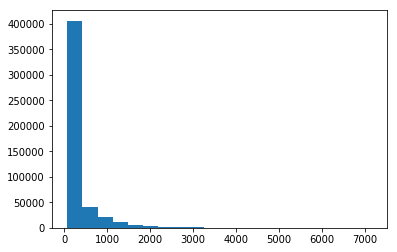

In [76]:
plt.hist(length_dist, bins = 20)

In [193]:
sequence[:1000]

'NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNAGCTTTTCATTCTGACTGCAACGGGCAATATGTCTCTGTGTGGATTAAAAAAAGAGTGTCTGATAGCAGCTTCTGAACTGGTTACCTGCCGTGAGTAAATTAAAATTTTATTGACTTAGGTCACTAAATACTTTAACCAATATAGGCATAGCGCACAGACAGATAAAAATTACAGAGTACACAACATCCATGAAACGCATTAGCACCACCATTACCACCACCATCACCATTACCACAGGTAACGGTGCGGGCTGACGCGTACAGGAAACACAGAAAAAAGCCCGCACCTGACAGTGCGGGCTTTTTTTTTCGACCAAAGGTAACGAGGTAACAACCATGCGAGTGTTGAAGTTCGGCGGTACATCAGTGGCAAATGCAGAACGTTTTCTGCGTGTTGCCGATATTCTGGAAAGCAATGCCAGGCAGGGGCAGGTGGCCACCGTCCTCTCTGCCCCCGCCAAAATCACCAACCACCTGGTGGCGATGATTGAAAAAACCATTAGCGGCCAGGATGCTTTACCCAATATCAGCGATGCCGAACGTATTTTTGCCGAACTTTTGACGGGACTCGCCGCCGCCCAGCCGGGGTTCCCGCTGGCGCAATTGAAAACTTTCGTCGATCAGGAATTTGCCCAAATAAAACATGTCCTGCATGGCATTAGTTTGTTGGGGCAGTGCCCGGATAGCATCAACGCTGCGCTGATTTGCCGTGGCGAGAAAATGTCGATCGCCATTATGGCCGGCGTATTAGAAGCGCGCGGTCACAACGTTACTGTTATCGATCCGGTCGAAAAACTGCTGGCAGTGGGGCATTACCTCGAATCTACCGTCGATATTGCTGAGTCCACCCGCCGTATTGCGGCAAGCCGCATTCCGGCTGATCACATGGTGCTGATGGCAGGTTTCACCGCCGGTAATGAAAAAGGCGAACTGGTGGTGCTTGGACGCA

In [184]:
print(inframe_write + outframe_write, generange_write)

9601 2018


In [64]:
def construct_postive_negative_samples(file_name, codon_type = 'start'):
    with gzip.open(file_name, 'rt', encoding='utf-8') as fp:
        seq_name = fp.readline().rstrip() # name
        seq_str = fp.readline().strip() # seq
        coding_region = fp.readline().strip() # gene_nogene
        encoded_gene = fp.readline().strip() # start
        encoded_stop = fp.readline().strip() # stop
    
    convert_str = ''.join([seq_convert[seq_str[k]] for k in range(len(seq_str))])
    # print(len(seq_str))
    
    
        
    negative_samples = []
    positive_samples = []
    
    for i in tqdm(range(len(seq_str)-100)):
        sample = seq_str[i:i+101]
        convert = convert_str[i:i+101]
        middle_codon = i + 49
        codon = seq_str[ middle_codon : middle_codon + 3 ]

        if(codon_type == 'start'):
            labelled_codon = encoded_gene[middle_codon:middle_codon+3]
            coding = coding_region[middle_codon]
            
            if ((codon in start_codon) and (labelled_codon == "111")):
                positive_samples += [list(convert)]
            elif ((codon in start_codon) and (coding == "1")):
                negative_samples += [list(convert)]    
        
        elif(codon_type == 'stop'):
            labelled_codon = encoded_stop[middle_codon:middle_codon+3]
            coding = coding_region[middle_codon]
            if ((codon in stop_codon) and (labelled_codon == "111")):
                positive_samples += [list(convert)]
            elif ((codon in stop_codon) and (coding == "1")):
                negative_samples += [list(convert)] 
            
    return (positive_samples, negative_samples)

In [65]:
positive_samples, negative_samples = construct_postive_negative_samples(full_genome_file, 'start')

KeyboardInterrupt: 

In [ ]:
len(positive_samples), len(negative_samples)

In [82]:
#positive_samples[0]

In [83]:
map(str,np.zeros(shape=(5000,101)))

In [49]:
with open(os.path.join(folder_name,'forward_batch_0_0_positive.txt'), 'w') as fp:
    for s in positive_samples:
        fp.write('{}\n'.format(''.join(s)))
        
with open(os.path.join(folder_name,'forward_batch_0_0_negative.txt'), 'w') as fp:
    for s in negative_samples:
        fp.write('{}\n'.format(''.join(s)))

## Load the model 

In [84]:
def PCA(data, k=2):
    # preprocess the data
    # X = torch.from_numpy(data)
    pca_vec = []
    for X in data:
    
        X_mean = torch.mean(X,0)
        X = X - X_mean.expand_as(X)

        # svd
        U,S,V = torch.svd(torch.t(X))
        pca_vec += [torch.mm(X,U[:,:k]).squeeze().detach().numpy()]
    
    return pca_vec

In [104]:
class AttnDecoderRNN(nn.Module):#corrected batch faster
    #(self, time_steps, embedding_dim, hidden_dim, vocab_size, tagset_size, mini_batch)
    def __init__(self, vocab_size, embedding_dim, \
                 hidden_dim, device, batch_size=100, debug=1, \
                 tagset_size=1, time_steps=101):
        super(AttnDecoderRNN, self).__init__()
        
        self.embedding_dim = embedding_dim
        self.time_steps = time_steps
        self.hidden_dim = hidden_dim
        self.minibatch_size = batch_size
        self.dropout_p = 0.25
        self.tagset_size = tagset_size
        self.device = device 
        self.hidden = self.init_hidden()
        self.hidden_bi = self.init_hidden(bidirectional=True)
        self.debug = debug
        

        self.embedding = nn.Embedding(vocab_size, embedding_dim)
        self.lstm_one = nn.LSTM(embedding_dim, int(hidden_dim/2), batch_first=True, bidirectional=True)
        self.dropout_one = nn.Dropout(self.dropout_p)
        self.lstm_two = nn.LSTM(hidden_dim, int(hidden_dim/2), batch_first=True, bidirectional=True)
        self.dropout_two = nn.Dropout(self.dropout_p)
        self.lstm_three = nn.LSTM(hidden_dim, int(hidden_dim/2), batch_first=True, bidirectional=True)
        self.dropout_three = nn.Dropout(self.dropout_p)

        self.attn_array = nn.ModuleList([nn.Linear(hidden_dim, hidden_dim) for i in range(time_steps)])
        
 	
        self.lstm_four = nn.LSTM(hidden_dim, int(hidden_dim/2), batch_first=True, bidirectional=True)
        self.dropout_seven = nn.Dropout(0.4)
        
        self.lstm_five = nn.LSTM(hidden_dim, int(hidden_dim/2), batch_first=True, bidirectional=True)
        self.dropout_eight = nn.Dropout(0.4)
        

        """
        self.attn_combine = nn.Linear(hidden_dim, hidden_dim)
        self.dropout = nn.Dropout(self.dropout_p)
        self.linear = nn.Linear(hidden_dim, 1)
        #embedding_dim*time_steps
        """

        self.hidden2tag_one = nn.Linear(hidden_dim*time_steps, 512)
        self.dropout_four = nn.Dropout(self.dropout_p)
        self.hidden2tag_two = nn.Linear(512, 128)
        self.dropout_five = nn.Dropout(self.dropout_p)
        self.hidden2tag_three = nn.Linear(128, 64)
        self.dropout_six = nn.Dropout(self.dropout_p)

        self.output = nn.Linear(64, tagset_size)

    def forward(self, input):
        init_embed = self.embedding(input)
        #embedded = init_embed.permute(1, 0, 2)
        if self.debug == 1:
            print("Embedding Shape: ", init_embed.shape)

        lstm_out, self.hidden_one = self.lstm_one(init_embed, self.hidden_bi)
        lstm_out = self.dropout_one(lstm_out)
        lstm_out, self.hidden_two = self.lstm_two(lstm_out, self.hidden_bi)
        lstm_out = self.dropout_two(lstm_out)
        lstm_out, self.hidden_three = self.lstm_three(lstm_out, self.hidden_bi)
        lstm_out = self.dropout_three(lstm_out)
        
        attn_applied = None
        #"""
        lstm_permute = lstm_out.permute(1, 0, 2)
        if self.debug == 1:
            print("LSTM Out Shape: ", lstm_permute.shape)

        attention = [self.attn_array[i](lstm_permute[i][:]) for i in range(self.time_steps)]
        attention = torch.stack(attention)
        attention.to(device)
        
        attention = attention.permute(1, 0, 2)
        if self.debug == 1:
            print("Attention Shape: ", attention.shape)
        
        attn_weights = F.softmax(attention, dim=2)
        #attn_weights = attn_weights.view(self.minibatch_size, self.time_steps, 1)
        if self.debug == 1:
            print("Softmax Shape: ", attn_weights.shape)
        
        #attn_applied = init_embed
        attn_applied = attn_weights * init_embed
        
        # potential lstm 
        if self.debug == 1:
            print("Attention Applied Shape: ", attn_applied.shape)
        
        lstm_out, self.hidden_one = self.lstm_four(attn_applied, self.hidden_bi)
        lstm_out = self.dropout_seven(lstm_out)
        if self.debug == 1:
            print("LSTM out: ", lstm_out.shape)
        
        lstm_out, self.hidden_two = self.lstm_five(lstm_out, self.hidden_bi)
        lstm_out = self.dropout_eight(lstm_out)    
        
        #attn_applied = attn_applied.view(self.minibatch_size, self.time_steps, -1)
        #attn_applied = torch.sum(attn_applied, dim=1)
        #output = F.relu(attn_applied)

        # lstm_out = attn_applied.contiguous().view(self.minibatch_size, -1)
        #"""
        
        #lstm_out = attn_applied.contiguous().view(self.minibatch_size, -1)
        lstm_out = lstm_out.contiguous().view(self.minibatch_size, -1)
        if self.debug == 1:
            print("LSTM Output Shape: ", lstm_out.shape)


        dense_out = self.hidden2tag_one(lstm_out[:])
        dense_out = F.relu(dense_out[:])
        dense_out = self.dropout_four(dense_out[:])

        dense_out = self.hidden2tag_two(dense_out[:])
        dense_out = F.relu(dense_out[:])
        dense_out = self.dropout_five(dense_out[:])

        dense_out = self.hidden2tag_three(dense_out[:])
        dense_out = F.relu(dense_out[:])
        dense_out = self.dropout_six(dense_out[:])

        tag_space = self.output(dense_out[:])
        #print(tag_space.shape)
        #tag_scores = F.sigmoid(tag_space)
        #tag_scores = F.softmax(tag_space, dim=1)
        #print(tag_scores.shape)
        return tag_space, attn_applied

    def init_hidden(self, bidirectional = False):
        # Before we've done anything, we dont have any hidden state.
        # Refer to the Pytorch documentation to see exactly
        # why they have this dimensionality.
        # The axes semantics are (num_layers, minibatch_size, hidden_dim)
        if(bidirectional):
            return (torch.zeros(2, self.minibatch_size, int(self.hidden_dim/2), device = device),
                    torch.zeros(2, self.minibatch_size, int(self.hidden_dim/2), device = device))
        else:
            return (torch.zeros(1, self.minibatch_size, self.hidden_dim, device = device),
                    torch.zeros(1, self.minibatch_size, self.hidden_dim, device = device))

In [105]:
# the_model.load_state_dict(torch.load(PATH))

In [106]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
def load_model_file(model_file, batch_size=5000):
    
    print(device)
    batch_size = 5000
    model = AttnDecoderRNN(5, 32, 32, device, batch_size=batch_size, debug=0)
    #model = model.cuda()
    model.to(device)

    model.load_state_dict(
        torch.load(
        model_file,
        map_location='cpu'
        )

    )
    
    model.eval()
    return model

In [107]:
model_start, model_end, model_coding = (
    load_model_file('/mnt/scratch7/hirak/Attention4DNASeqRepresentation/models/pytorch_model_start.param'),
    load_model_file('/mnt/scratch7/hirak/Attention4DNASeqRepresentation/models/pytorch_model_stop.param'),
    load_model_file('/mnt/scratch7/hirak/Attention4DNASeqRepresentation/models/pytorch_model_coding.param'),
)

cpu
cpu
cpu


In [153]:
positive_sample_padded = np.concatenate([np.array(positive_samples), np.zeros((3000, 101)).astype(int)])

In [154]:
X_positive = torch.from_numpy(np.array(positive_sample_padded[:5000]).astype(int))
X_negative = torch.from_numpy(np.array(negative_samples[:5000]).astype(int))

#X_positive = torch.from_numpy(original_neg_coding_data[:5000].astype(int))
#X_negative = torch.from_numpy(original_neg_intergenic_data[:5000].astype(int))

In [155]:
tag_space_pos, attn_applied_pos = model(X_positive)

In [156]:
tag_space_neg, attn_applied_neg = model(X_negative)

In [157]:
def binary_accuracy(preds, y):
    """
    Returns accuracy per batch, i.e. if you get 8/10 right, this returns 0.8, NOT 8
    """

    #round predictions to the closest integer
    rounded_preds = torch.round(F.sigmoid(preds))
    correct = (rounded_preds == y).float() #convert into float for division 
    acc = correct.sum()/len(correct)
    
    return acc

In [158]:
positive_target = torch.from_numpy(np.ones(5000).reshape(5000,1).astype(np.int))

In [159]:
negative_target = torch.from_numpy(np.zeros(5000).reshape(5000,1).astype(np.int))

In [160]:
binary_accuracy(tag_space_pos[:2012].flatten(), positive_target[:2012].float().flatten())

/home/hirak/miniconda2/envs/pytorch/lib/python3.7/site-packages/torch/nn/functional.py:1380: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


tensor(0.9916)

In [152]:
binary_accuracy(tag_space_neg[:5000].flatten(), negative_target[:5000].float().flatten())

/home/hirak/miniconda2/envs/pytorch/lib/python3.7/site-packages/torch/nn/functional.py:1380: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


tensor(0.7788)

(array([ 10.,  30., 157., 299., 417., 508., 391., 166.,  28.,   6.]),
 array([-2.5856419 , -0.69373167,  1.1981785 ,  3.0900886 ,  4.981999  ,
         6.873909  ,  8.76582   , 10.657729  , 12.54964   , 14.441549  ,
        16.33346   ], dtype=float32),
 <a list of 10 Patch objects>)

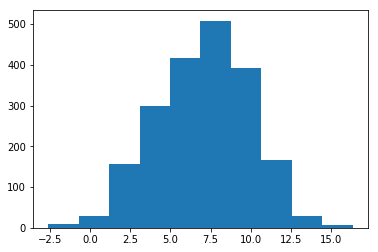

In [36]:
plt.hist(tag_space_pos[:2012].flatten().detach().numpy())

(array([   7.,   19.,   94.,  375.,  855., 1288., 1227.,  812.,  288.,
          35.]), array([-31.712965  , -27.206863  , -22.700762  , -18.194658  ,
        -13.688557  ,  -9.182455  ,  -4.676353  ,  -0.17025109,
          4.3358507 ,   8.841953  ,  13.348055  ], dtype=float32), <a list of 10 Patch objects>)

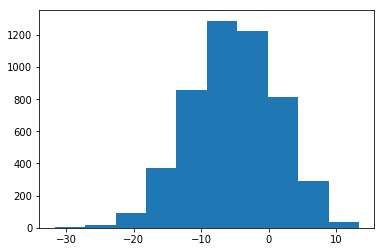

In [37]:
plt.hist(tag_space_neg.flatten().detach().numpy())

In [107]:
pca_attn_pos = PCA(attn_applied_pos, 1)
pca_attn_neg = PCA(attn_applied_neg, 1)

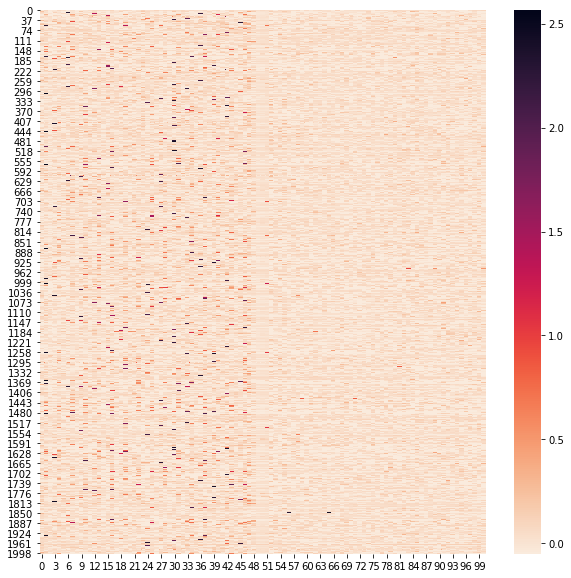

In [108]:
fig, ax = plt.subplots(figsize=(10,10))
cmap = sns.cm.rocket_r
sns.heatmap(np.array(pca_attn_pos[:2000]),
            ax = ax, 
            annot=False,
                 fmt=".3f",
    
                 vmin=-0.05,
                 cmap = cmap)

In [109]:
from Bio.Seq import Seq
from Bio import motifs

In [110]:
weblogo_seq = [Seq(''.join([seq_convert_rev[k] for k in a])) for a in np.array(positive_samples[:2000])]

In [111]:
promoter = [weblogo_seq[i][39:45] for i in range(0,2000)]

IndexError: list index out of range

In [99]:
sorted(promoter)

[Seq('AAAAAA'),
 Seq('AAAAAC'),
 Seq('AAAAAT'),
 Seq('AAAAAT'),
 Seq('AAAAAT'),
 Seq('AAAAAT'),
 Seq('AAAACC'),
 Seq('AAAAGA'),
 Seq('AAAAGA'),
 Seq('AAAAGA'),
 Seq('AAAAGT'),
 Seq('AAAAGT'),
 Seq('AAAAGT'),
 Seq('AAAATG'),
 Seq('AAACAG'),
 Seq('AAACAT'),
 Seq('AAACGC'),
 Seq('AAACTA'),
 Seq('AAACTC'),
 Seq('AAAGAA'),
 Seq('AAAGAT'),
 Seq('AAAGCA'),
 Seq('AAAGCG'),
 Seq('AAAGGA'),
 Seq('AAAGGA'),
 Seq('AAAGGT'),
 Seq('AAAGGT'),
 Seq('AAAGTC'),
 Seq('AAATAC'),
 Seq('AAATAC'),
 Seq('AAATAT'),
 Seq('AAATCA'),
 Seq('AAATCT'),
 Seq('AAATGC'),
 Seq('AAATGG'),
 Seq('AAATTA'),
 Seq('AAATTT'),
 Seq('AACAAA'),
 Seq('AACAAA'),
 Seq('AACAAA'),
 Seq('AACAAC'),
 Seq('AACAAT'),
 Seq('AACACG'),
 Seq('AACACT'),
 Seq('AACACT'),
 Seq('AACAGC'),
 Seq('AACAGC'),
 Seq('AACATA'),
 Seq('AACATA'),
 Seq('AACCGA'),
 Seq('AACCGT'),
 Seq('AACGCG'),
 Seq('AACGTA'),
 Seq('AACGTA'),
 Seq('AACTAA'),
 Seq('AACTCA'),
 Seq('AACTGG'),
 Seq('AAGAAA'),
 Seq('AAGAAA'),
 Seq('AAGAAC'),
 Seq('AAGAAG'),
 Seq('AAGACA'),
 Seq('AA

In [112]:
with open('weblogo.seq','w') as fp:
    for s in weblogo_seq:
        fp.write("{}\n".format(s))

In [114]:
m = motifs.create(weblogo_seq)

In [115]:
m.weblogo("mymotif_stop.png")

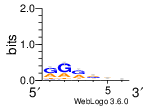

In [103]:
from IPython.display import Image
Image("mymotif_promoter.png")

/home/hirak/miniconda2/envs/pytorch/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log
  


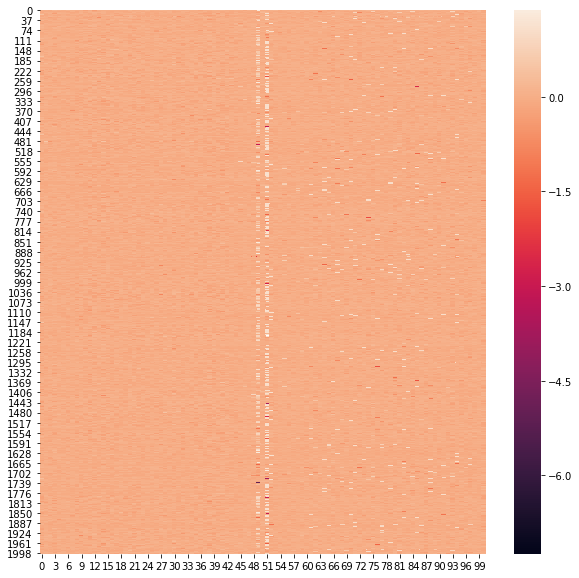

In [104]:
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(np.log(np.array(pca_attn_neg[:2000])+1),ax = ax)
